## Data Cleaning

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
fire_csv = "Datasets/Fires.csv"

#List of columns in the csv to use
columns = ['LATITUDE',
           'LONGITUDE',
           'STATE',
           'STAT_CAUSE_DESCR',
           'DISCOVERY_DOY',
           'CONT_DOY',
           'FIRE_YEAR',
           'FIRE_SIZE',
           'FIRE_SIZE_CLASS']
# Read in the wildfire csv, only first 1000 rows for testing (nrows=1000)
uncutfires_df = pd.read_csv(fire_csv, usecols=columns)

uncutfires_df = uncutfires_df[uncutfires_df['FIRE_YEAR'] >= 2000]
uncutfires_df = uncutfires_df[uncutfires_df['STAT_CAUSE_DESCR'] != 'Arson']
uncutfires_df = uncutfires_df.dropna(subset=['CONT_DOY'],axis=0).reset_index(drop=True)
uncutfires_df = uncutfires_df.astype({'CONT_DOY': 'int'})
cutfires_df = uncutfires_df[uncutfires_df['DISCOVERY_DOY'] != uncutfires_df['CONT_DOY']]
cutfires_df.sort_values(by=['FIRE_YEAR','DISCOVERY_DOY'],inplace=True)
fires_df = cutfires_df.dropna(axis=0).reset_index(drop=True)

fires_df


FileNotFoundError: [Errno 2] File b'Datasets/Fires.csv' does not exist: b'Datasets/Fires.csv'

In [ ]:
#Adding extra columns for analysis
fires_df['FIRE_DURATION']=''
fires_df['FIRE_DISC_DATE']=''
fires_df['FIRE_CONT_DATE']=''
fires_df['FIRE_MONTH_DISC']=''
fires_df['FIRE_YEAR_DISC']=''

for i in range(len(fires_df)):
    fires_df['FIRE_DURATION'][i] = fires_df['CONT_DOY'][i] - fires_df['DISCOVERY_DOY'][i]
    fires_df['FIRE_DISC_DATE'][i] = (datetime.datetime(fires_df['FIRE_YEAR'][i], 1, 1) + datetime.timedelta(int(fires_df['DISCOVERY_DOY'][i]) - 1)).date()
    fires_df['FIRE_CONT_DATE'][i] = (datetime.datetime(fires_df['FIRE_YEAR'][i], 1, 1) + datetime.timedelta(int(fires_df['CONT_DOY'][i]) - 1)).date()
    fires_df['FIRE_MONTH_DISC'][i] = fires_df['FIRE_DISC_DATE'][i].month
    fires_df['FIRE_YEAR_DISC'][i] = fires_df['FIRE_DISC_DATE'][i].year
    
#drop now unnecessary columns
fires_df = fires_df.drop(columns=['CONT_DOY','DISCOVERY_DOY','FIRE_YEAR'])
fires_df = fires_df.sort_values(by=['FIRE_DISC_DATE','FIRE_SIZE']).reset_index(drop=True)

#add additional date columns for ease of access
#for i in range(len(fires_df)):
    

#rearrange columns for readability
fires_df = fires_df[['FIRE_DISC_DATE',
                     'FIRE_CONT_DATE',
                     'FIRE_DURATION',
                     'FIRE_SIZE_CLASS',
                     'FIRE_SIZE',
                     'STAT_CAUSE_DESCR',
                     'STATE',
                     'LATITUDE',
                     'LONGITUDE',
                     'FIRE_YEAR_DISC',
                     'FIRE_MONTH_DISC']]
fires_df.head()

In [4]:
fires_df.to_csv("Culled Wildfires 2000-2015.csv",index=False)

In [56]:
#grouping by various interesting axes
countByStYrCause = fires_df.groupby(['STATE','FIRE_YEAR_DISC','STAT_CAUSE_DESCR']).agg(Total_Fires=pd.NamedAgg('FIRE_SIZE','count'))
countByStYrSize = fires_df.groupby(['STATE','FIRE_YEAR_DISC', 'FIRE_SIZE_CLASS']).agg(Total_Fires=pd.NamedAgg('FIRE_SIZE','count'))
countByCauseSize = fires_df.groupby(['STAT_CAUSE_DESCR','FIRE_SIZE_CLASS']).agg(Total_Fires=pd.NamedAgg('FIRE_SIZE','count'))
countByStYrDuration = fires_df.groupby(['STATE','FIRE_YEAR_DISC','FIRE_DURATION']).agg(Total_Fires=pd.NamedAgg('FIRE_SIZE','count'))
countByStYr = fires_df.groupby(['STATE','FIRE_YEAR_DISC']).agg(Total_Fires=pd.NamedAgg('FIRE_SIZE','count'))

In [57]:
countByStYrCause

Total_Fires
STATE FIRE_YEAR_DISC STAT_CAUSE_DESCR             
AL    2000           Arson                       6
AR    2000           Arson                       7
                     Equipment Use               1
AZ    2000           Arson                       8
                     Campfire                    7
...                                            ...
WV    2000           Structure                   2
WY    2000           Campfire                    1
                     Debris Burning              2
                     Equipment Use               1
                     Fireworks                   3

[114 rows x 1 columns]

In [58]:
countByStYrSize

Total_Fires
STATE FIRE_YEAR_DISC FIRE_SIZE_CLASS             
AL    2000           B                          4
                     C                          1
                     D                          1
AR    2000           A                          2
                     B                          4
...                                           ...
WV    2000           C                         11
                     E                          1
WY    2000           A                          1
                     B                          3
                     C                          3

[87 rows x 1 columns]

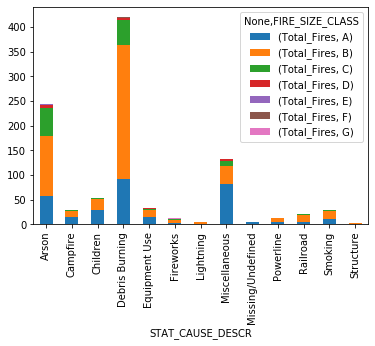

In [64]:
countByCauseSize.unstack().plot(kind='bar', stacked=True)

In [60]:
countByStYr

,,Total_Fires
STATE,FIRE_YEAR_DISC,
AL,2000,6
AR,2000,8
AZ,2000,25
CA,2000,68
FL,2000,10
GA,2000,526
IA,2000,1
IL,2000,3
IN,2000,2


In [61]:
countByStYrDuration

Total_Fires
STATE FIRE_YEAR_DISC FIRE_DURATION             
AL    2000           0.0                      5
                     3.0                      1
AR    2000           0.0                      8
AZ    2000           0.0                     21
                     1.0                      4
CA    2000           0.0                     63
                     1.0                      2
                     5.0                      1
                     19.0                     1
                     335.0                    1
FL    2000           0.0                     10
GA    2000           0.0                    523
                     1.0                      2
                     182.0                    1
IA    2000           0.0                      1
IL    2000           0.0                      3
IN    2000           0.0                      2
KS    2000           0.0                      1
KY    2000           0.0                      1
                     1.0                      4
                     2.0                      1
                     5.0                      1
LA    2000           0.0                     12
                     1.0                      1
                     6.0                      1
MD    2000           0.0                      1
ME    2000           0.0                      2
MO    2000           0.0                      9
                     1.0                      2
MS    2000           0.0                      8
                     1.0                     11
                     2.0                      2
MT    2000           1.0                      1
NC    2000           0.0                      7
ND    2000           0.0                      2
                     1.0                      2
NE    2000           0.0                      5
NM    2000           0.0                     16
                     1.0                      2
NV    2000           0.0                      6
NY    2000           0.0                     47
                     1.0                      4
OH    2000           0.0                      2
OK    2000           0.0                     27
                     1.0                      1
                     4.0                      1
SC    2000           0.0                     22
                     1.0                      1
SD    2000           0.0                     50
TN    2000           0.0                      3
TX    2000           0.0                     14
                     1.0                      5
UT    2000           0.0                      3
VA    2000           0.0                      1
                     1.0                      1
WV    2000           0.0                     57
                     1.0                      7
WY    2000           0.0                      6
                     1.0                      1